In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w17.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/output_2023_w05.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/output_2023_w10.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w03.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/output_2023_w18.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w05.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/ou

In [48]:
import os

data_dir = '/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train'
print(sorted(os.listdir(data_dir)))


['input_2023_w01.csv', 'input_2023_w02.csv', 'input_2023_w03.csv', 'input_2023_w04.csv', 'input_2023_w05.csv', 'input_2023_w06.csv', 'input_2023_w07.csv', 'input_2023_w08.csv', 'input_2023_w09.csv', 'input_2023_w10.csv', 'input_2023_w11.csv', 'input_2023_w12.csv', 'input_2023_w13.csv', 'input_2023_w14.csv', 'input_2023_w15.csv', 'input_2023_w16.csv', 'input_2023_w17.csv', 'input_2023_w18.csv', 'output_2023_w01.csv', 'output_2023_w02.csv', 'output_2023_w03.csv', 'output_2023_w04.csv', 'output_2023_w05.csv', 'output_2023_w06.csv', 'output_2023_w07.csv', 'output_2023_w08.csv', 'output_2023_w09.csv', 'output_2023_w10.csv', 'output_2023_w11.csv', 'output_2023_w12.csv', 'output_2023_w13.csv', 'output_2023_w14.csv', 'output_2023_w15.csv', 'output_2023_w16.csv', 'output_2023_w17.csv', 'output_2023_w18.csv']


In [49]:
import glob

input_files = sorted(glob.glob(data_dir + '/input_*.csv'))
output_files = sorted(glob.glob(data_dir + '/output_*.csv'))

# Read and concatenate all weeks
all_inputs = pd.concat([pd.read_csv(f) for f in input_files], axis=0)
all_outputs = pd.concat([pd.read_csv(f) for f in output_files], axis=0)
print(all_inputs.shape, all_outputs.shape)


(4880579, 23) (562936, 6)


In [2]:
data = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")

/tmp/ipykernel_36/610503743.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")


In [3]:
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,game_id,season,week,game_date,game_time_eastern,home_team_abbr,visitor_team_abbr,play_id,play_description,quarter,...,team_coverage_type,penalty_yards,pre_penalty_yards_gained,yards_gained,expected_points,expected_points_added,pre_snap_home_team_win_probability,pre_snap_visitor_team_win_probability,home_team_win_probability_added,visitor_team_win_probility_added
0,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,3461,(10:46) (Shotgun) J.Goff pass deep left to J.R...,4,...,COVER_2_ZONE,NaN,18,18,-0.664416,2.945847,0.834296,0.165704,-0.081149,0.081149
1,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,461,(7:30) J.Goff pass short right to J.Reynolds t...,1,...,COVER_6_ZONE,NaN,21,21,1.926131,1.345633,0.544618,0.455382,-0.029415,0.029415
2,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1940,(:09) (Shotgun) J.Goff pass incomplete deep ri...,2,...,COVER_2_ZONE,NaN,0,0,0.281891,-0.081964,0.771994,0.228006,0.000791,-0.000791
3,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1711,"(:45) (No Huddle, Shotgun) P.Mahomes pass deep...",2,...,COVER_2_ZONE,NaN,26,26,3.452352,2.342947,0.663187,0.336813,0.041843,-0.041843
4,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1588,(1:54) (Shotgun) P.Mahomes pass incomplete dee...,2,...,COVER_4_ZONE,NaN,0,0,1.921525,-0.324035,0.615035,0.384965,0.000061,-0.000061


In [4]:
supplementary_data = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv')
print(supplementary_data.shape)
print(supplementary_data.columns)
display(supplementary_data.head())



(18009, 41)
Index(['game_id', 'season', 'week', 'game_date', 'game_time_eastern',
       'home_team_abbr', 'visitor_team_abbr', 'play_id', 'play_description',
       'quarter', 'game_clock', 'down', 'yards_to_go', 'possession_team',
       'defensive_team', 'yardline_side', 'yardline_number',
       'pre_snap_home_score', 'pre_snap_visitor_score',
       'play_nullified_by_penalty', 'pass_result', 'pass_length',
       'offense_formation', 'receiver_alignment', 'route_of_targeted_receiver',
       'play_action', 'dropback_type', 'dropback_distance',
       'pass_location_type', 'defenders_in_the_box', 'team_coverage_man_zone',
       'team_coverage_type', 'penalty_yards', 'pre_penalty_yards_gained',
       'yards_gained', 'expected_points', 'expected_points_added',
       'pre_snap_home_team_win_probability',
       'pre_snap_visitor_team_win_probability',
       'home_team_win_probability_added', 'visitor_team_win_probility_added'],
      dtype='object')


/tmp/ipykernel_36/3869003294.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supplementary_data = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv')
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in 

,game_id,season,week,game_date,game_time_eastern,home_team_abbr,visitor_team_abbr,play_id,play_description,quarter,...,team_coverage_type,penalty_yards,pre_penalty_yards_gained,yards_gained,expected_points,expected_points_added,pre_snap_home_team_win_probability,pre_snap_visitor_team_win_probability,home_team_win_probability_added,visitor_team_win_probility_added
0,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,3461,(10:46) (Shotgun) J.Goff pass deep left to J.R...,4,...,COVER_2_ZONE,NaN,18,18,-0.664416,2.945847,0.834296,0.165704,-0.081149,0.081149
1,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,461,(7:30) J.Goff pass short right to J.Reynolds t...,1,...,COVER_6_ZONE,NaN,21,21,1.926131,1.345633,0.544618,0.455382,-0.029415,0.029415
2,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1940,(:09) (Shotgun) J.Goff pass incomplete deep ri...,2,...,COVER_2_ZONE,NaN,0,0,0.281891,-0.081964,0.771994,0.228006,0.000791,-0.000791
3,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1711,"(:45) (No Huddle, Shotgun) P.Mahomes pass deep...",2,...,COVER_2_ZONE,NaN,26,26,3.452352,2.342947,0.663187,0.336813,0.041843,-0.041843
4,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1588,(1:54) (Shotgun) P.Mahomes pass incomplete dee...,2,...,COVER_4_ZONE,NaN,0,0,1.921525,-0.324035,0.615035,0.384965,0.000061,-0.000061


In [5]:
# Preview a week’s input
input_2023_w17 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w17.csv')
print(input_2023_w17.shape)
print(input_2023_w17.columns)
display(input_2023_w17.head())

(277582, 23)
Index(['game_id', 'play_id', 'player_to_predict', 'nfl_id', 'frame_id',
       'play_direction', 'absolute_yardline_number', 'player_name',
       'player_height', 'player_weight', 'player_birth_date',
       'player_position', 'player_side', 'player_role', 'x', 'y', 's', 'a',
       'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y'],
      dtype='object')


,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023122800,138,True,41243,1,right,30,C.J. Mosley,6-2,250,...,Defensive Coverage,36.36,26.65,0.02,0.02,334.76,257.58,9,33.490002,30.9
1,2023122800,138,True,41243,2,right,30,C.J. Mosley,6-2,250,...,Defensive Coverage,36.35,26.67,0.02,0.02,336.10,258.23,9,33.490002,30.9
2,2023122800,138,True,41243,3,right,30,C.J. Mosley,6-2,250,...,Defensive Coverage,36.36,26.69,0.02,0.02,339.78,259.66,9,33.490002,30.9
3,2023122800,138,True,41243,4,right,30,C.J. Mosley,6-2,250,...,Defensive Coverage,36.36,26.70,0.02,0.02,343.50,260.24,9,33.490002,30.9
4,2023122800,138,True,41243,5,right,30,C.J. Mosley,6-2,250,...,Defensive Coverage,36.37,26.74,0.02,0.02,349.19,260.92,9,33.490002,30.9


In [6]:
# Preview a week’s output
output_2023_w17 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/output_2023_w17.csv')
print(output_2023_w17.shape)
print(output_2023_w17.columns)
display(output_2023_w17.head())

(33076, 6)
Index(['game_id', 'play_id', 'nfl_id', 'frame_id', 'x', 'y'], dtype='object')


,game_id,play_id,nfl_id,frame_id,x,y
0,2023122800,138,41243,1,42.87,28.71
1,2023122800,138,41243,2,43.25,28.93
2,2023122800,138,41243,3,43.60,29.18
3,2023122800,138,41243,4,43.91,29.45
4,2023122800,138,41243,5,44.20,29.75


In [7]:
print(supplementary_data.info())
print(input_2023_w17.info())
print(output_2023_w17.info())
print(supplementary_data.isnull().sum())
# Repeat for input/output if dataset sizes allow

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18009 entries, 0 to 18008
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   game_id                                18009 non-null  int64  
 1   season                                 18009 non-null  int64  
 2   week                                   18009 non-null  int64  
 3   game_date                              18009 non-null  object 
 4   game_time_eastern                      18009 non-null  object 
 5   home_team_abbr                         18009 non-null  object 
 6   visitor_team_abbr                      18009 non-null  object 
 7   play_id                                18009 non-null  int64  
 8   play_description                       18009 non-null  object 
 9   quarter                                18009 non-null  int64  
 10  game_clock                             18009 non-null  object 
 11  do

In [8]:
display(supplementary_data.describe())
display(input_2023_w17.describe())
display(output_2023_w17.describe())


,game_id,season,week,play_id,quarter,down,yards_to_go,yardline_number,pre_snap_home_score,pre_snap_visitor_score,...,defenders_in_the_box,penalty_yards,pre_penalty_yards_gained,yards_gained,expected_points,expected_points_added,pre_snap_home_team_win_probability,pre_snap_visitor_team_win_probability,home_team_win_probability_added,visitor_team_win_probility_added
count,1.800900e+04,18009.000000,18009.000000,18009.000000,18009.000000,18009.000000,18009.000000,18009.000000,18009.000000,18009.000000,...,18009.000000,460.000000,18009.000000,18009.000000,18009.000000,18009.000000,18009.000000,18009.000000,18009.000000,18009.000000
mean,2.023407e+09,2023.216614,10.880726,2195.702760,2.581043,1.961575,8.730357,30.388750,11.593759,10.436171,...,5.993003,2.778261,8.077128,8.145760,2.081460,0.226768,0.549409,0.450591,-0.000064,0.000064
std,5.381581e+05,0.411949,5.453520,1252.668653,1.121554,0.864595,3.945420,12.247021,9.881427,9.220059,...,0.979893,8.025475,9.870800,9.968593,1.540551,1.641390,0.306486,0.306486,0.047037,0.047037
min,2.023091e+09,2023.000000,1.000000,54.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,-23.000000,-11.000000,-22.000000,-2.899994,-12.384484,0.000840,0.000827,-0.530770,-0.820404
25%,2.023102e+09,2023.000000,6.000000,1137.000000,2.000000,1.000000,6.000000,23.000000,3.000000,3.000000,...,5.000000,0.000000,0.000000,0.000000,0.963505,-0.629976,0.297789,0.180181,-0.015070,-0.015560
50%,2.023113e+09,2023.000000,12.000000,2170.000000,3.000000,2.000000,10.000000,31.000000,10.000000,9.000000,...,6.000000,0.000000,6.000000,6.000000,1.869795,0.121603,0.579080,0.420920,0.000030,-0.000030
75%,2.024011e+09,2023.000000,16.000000,3257.000000,4.000000,3.000000,10.000000,40.000000,17.000000,17.000000,...,7.000000,9.250000,12.000000,12.000000,3.142007,1.176998,0.819819,0.702211,0.015560,0.015070
max,2.025011e+09,2024.000000,18.000000,5258.000000,5.000000,4.000000,40.000000,50.000000,70.000000,48.000000,...,11.000000,15.000000,92.000000,92.000000,6.580085,8.968813,0.999173,0.999160,0.820404,0.530770


,game_id,play_id,nfl_id,frame_id,absolute_yardline_number,player_weight,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
count,2.775820e+05,277582.000000,277582.000000,277582.000000,277582.000000,277582.000000,277582.000000,277582.000000,277582.000000,277582.000000,277582.000000,277582.000000,277582.000000,277582.000000,277582.000000
mean,2.023123e+09,2049.622702,49636.942536,16.017375,62.147099,211.389975,61.623112,26.623822,3.014160,2.119304,183.375602,178.755236,11.823277,60.785344,26.138436
std,7.953876e+01,1184.060052,5283.702359,10.923433,23.453876,21.972406,23.885043,9.884467,2.219738,1.417393,100.234171,98.053192,5.327625,25.392219,15.212617
min,2.023123e+09,55.000000,30842.000000,1.000000,11.000000,153.000000,0.640000,1.060000,0.000000,0.000000,0.000000,0.000000,5.000000,-3.000000,-3.660000
25%,2.023123e+09,1039.000000,45215.000000,8.000000,43.000000,195.000000,43.230000,18.970000,1.100000,1.010000,92.510000,89.760000,8.000000,42.910000,13.110000
50%,2.023123e+09,2036.000000,48646.000000,15.000000,62.000000,206.000000,61.970000,26.670000,2.710000,1.930000,188.410000,172.960000,10.000000,60.759998,25.799999
75%,2.023123e+09,3021.000000,54536.000000,22.000000,82.000000,225.000000,79.680000,34.280000,4.610000,3.050000,271.310000,269.900000,14.000000,78.550003,39.369999
max,2.023123e+09,4628.000000,56673.000000,81.000000,109.000000,342.000000,119.520000,52.560000,10.080000,11.100000,359.990000,360.000000,32.000000,122.970001,54.000000


,game_id,play_id,nfl_id,frame_id,x,y
count,3.307600e+04,33076.000000,33076.000000,33076.000000,33076.000000,33076.000000
mean,2.023123e+09,2026.194975,49755.131334,7.947182,60.517160,26.338611
std,7.367345e+01,1181.102882,5032.266463,5.688818,25.014166,13.084890
min,2.023123e+09,55.000000,37078.000000,1.000000,1.020000,0.520000
25%,2.023123e+09,979.000000,45571.000000,4.000000,43.700000,15.030000
50%,2.023123e+09,1976.000000,52423.000000,7.000000,60.590000,26.040000
75%,2.023123e+09,3041.000000,54513.000000,11.000000,76.842500,37.840000
max,2.023123e+09,4628.000000,56673.000000,32.000000,119.540000,52.660000


In [9]:
numeric_cols = input_2023_w17.select_dtypes(include=['number']).columns
categorical_cols = input_2023_w17.select_dtypes(include=['object', 'category']).columns
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: Index(['game_id', 'play_id', 'nfl_id', 'frame_id', 'absolute_yardline_number',
       'player_weight', 'x', 'y', 's', 'a', 'dir', 'o', 'num_frames_output',
       'ball_land_x', 'ball_land_y'],
      dtype='object')
Categorical columns: Index(['play_direction', 'player_name', 'player_height', 'player_birth_date',
       'player_position', 'player_side', 'player_role'],
      dtype='object')


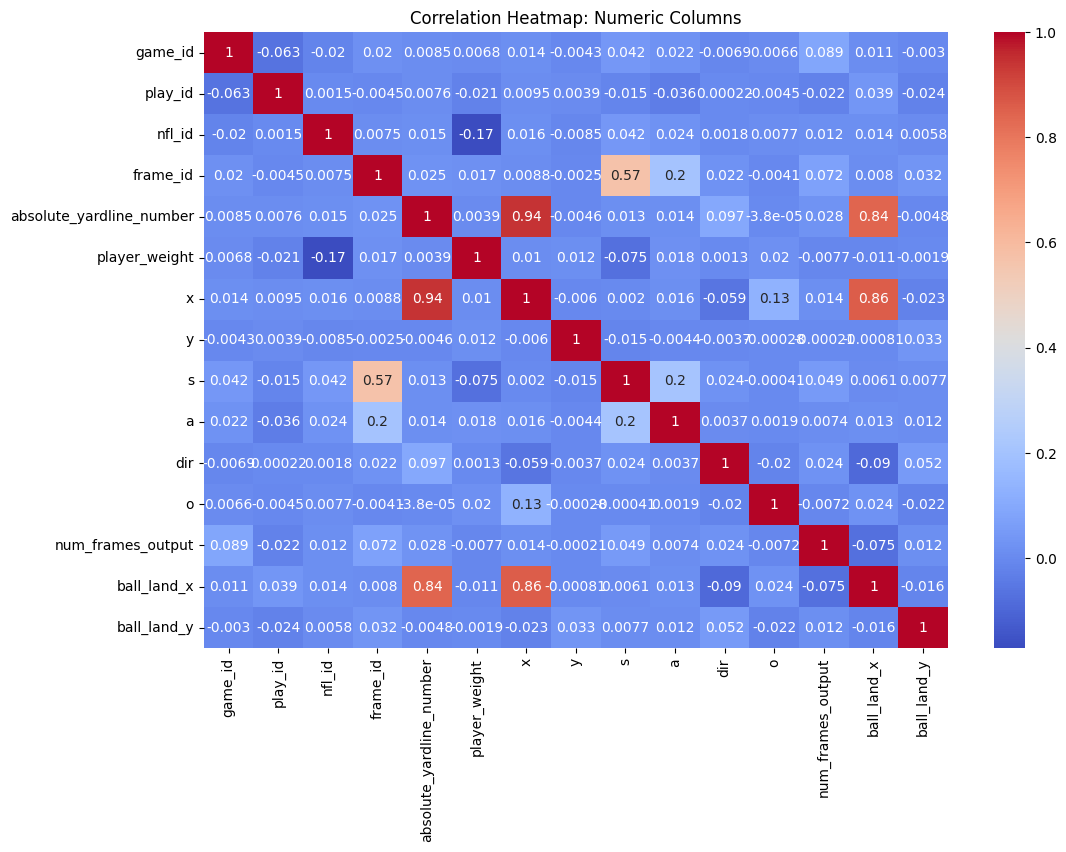

In [10]:
corr = input_2023_w17[numeric_cols].corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Numeric Columns')
plt.show()


In [11]:
for col in categorical_cols:
    print(f"{col}: {input_2023_w17[col].unique()[:10]}")  # Print first 10 unique values


play_direction: ['right' 'left']
player_name: ['C.J. Mosley' 'D.J. Reed' 'Jordan Whitehead' 'Michael Carter II'
 'Quincy Williams' 'Sauce Gardner' 'Tony Adams' 'Cedric Tillman'
 'David Bell' 'Elijah Moore']
player_height: ['6-2' '5-9' '5-10' '5-11' '6-3' '6-0' '6-6' '6-4' '6-1' '6-5']
player_birth_date: ['1992-06-19' '1996-11-11' '1997-03-18' '1999-03-08' '1996-08-28'
 '2001-08-31' '1999-01-24' '2000-04-19' '2000-12-14' '2000-03-27']
player_position: ['ILB' 'CB' 'SS' 'OLB' 'WR' 'RB' 'QB' 'TE' 'FS' 'MLB']
player_side: ['Defense' 'Offense']
player_role: ['Defensive Coverage' 'Other Route Runner' 'Passer' 'Targeted Receiver']


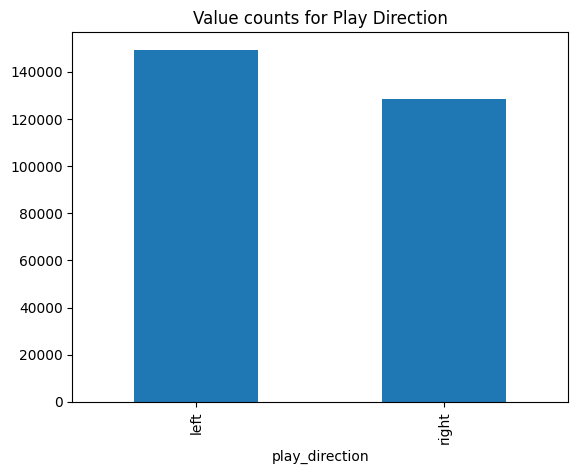

In [12]:
input_2023_w17['play_direction'].value_counts().plot(kind='bar')
plt.title('Value counts for Play Direction')
plt.show()


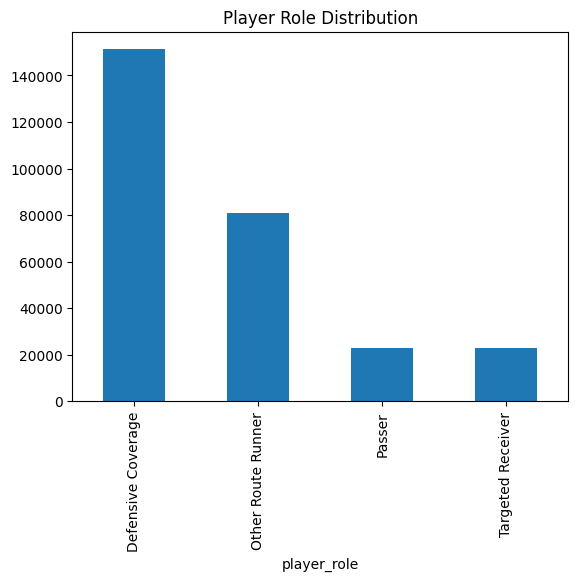

In [13]:
input_2023_w17['player_role'].value_counts().plot(kind='bar')
plt.title('Player Role Distribution')
plt.show()


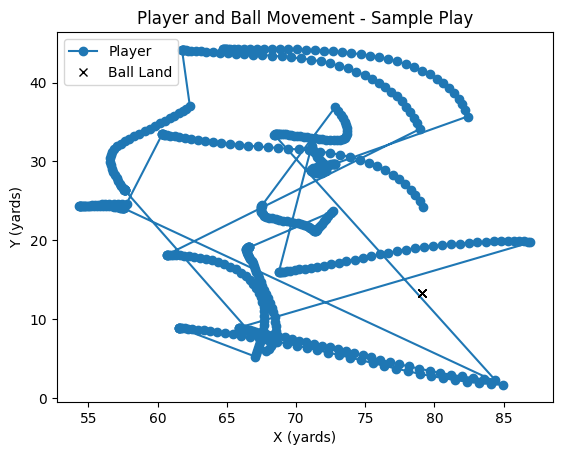

In [14]:
# Pick a random play, visualize all players + ball over time
example_play = input_2023_w17[input_2023_w17['play_id'] == input_2023_w17['play_id'].sample().iloc[0]]
plt.plot(example_play['x'], example_play['y'], 'o-', label='Player')
plt.plot(example_play['ball_land_x'], example_play['ball_land_y'], 'kx', label='Ball Land')
plt.legend()
plt.title('Player and Ball Movement - Sample Play')
plt.xlabel('X (yards)')
plt.ylabel('Y (yards)')
plt.show()


In [15]:
input_2023_w17['distance_to_ball_land'] = ((input_2023_w17['x'] - input_2023_w17['ball_land_x'])**2 + 
                                           (input_2023_w17['y'] - input_2023_w17['ball_land_y'])**2)**0.5


In [16]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ['play_direction', 'player_role', 'player_position', 'player_side']
df_encoded = pd.get_dummies(input_2023_w17, columns=cat_features)


In [17]:
def height_to_inches(height_str):
    # Safely handle NaNs or wrong formats
    if pd.isna(height_str):
        return None
    feet, inches = height_str.split('-')
    return int(feet) * 12 + int(inches)

input_2023_w17['player_height_inches'] = input_2023_w17['player_height'].apply(height_to_inches)


In [18]:
from sklearn.linear_model import LinearRegression
drop_cols = ['player_name', 'player_birth_date', 'player_height']  # Remove raw string columns
X = df_encoded.drop(drop_cols + ['ball_land_x', 'ball_land_y'], axis=1)
print(X.dtypes)
assert all(pd.api.types.is_numeric_dtype(dt) for dt in X.dtypes), "Non-numeric column found! Check dropped columns & encoding."

y = df_encoded[['ball_land_x', 'ball_land_y']]
print(X.dtypes)  # Inspect remaining types after dropping names/dates



game_id                             int64
play_id                             int64
player_to_predict                    bool
nfl_id                              int64
frame_id                            int64
absolute_yardline_number            int64
player_weight                       int64
x                                 float64
y                                 float64
s                                 float64
a                                 float64
dir                               float64
o                                 float64
num_frames_output                   int64
distance_to_ball_land             float64
play_direction_left                  bool
play_direction_right                 bool
player_role_Defensive Coverage       bool
player_role_Other Route Runner       bool
player_role_Passer                   bool
player_role_Targeted Receiver        bool
player_position_CB                   bool
player_position_DE                   bool
player_position_DT                

In [19]:

model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)
print(preds)

[[38.98567166 24.79337572]
 [38.9896601  24.85932765]
 [38.99263682 24.92601104]
 ...
 [59.15606437 26.46758913]
 [59.08152557 26.599496  ]
 [58.98185361 26.71360259]]


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_x = np.sqrt(mean_squared_error(y['ball_land_x'], preds[:, 0]))
rmse_y = np.sqrt(mean_squared_error(y['ball_land_y'], preds[:, 1]))
print(f'RMSE ball_land_x: {rmse_x:.3f}, RMSE ball_land_y: {rmse_y:.3f}')


RMSE ball_land_x: 10.243, RMSE ball_land_y: 15.091


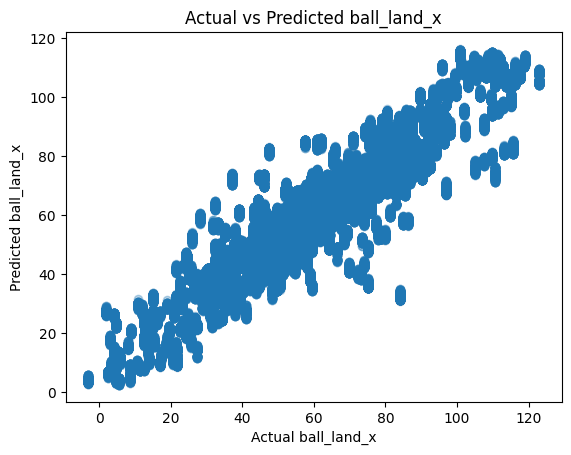

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y['ball_land_x'], preds[:, 0], alpha=0.3)
plt.xlabel('Actual ball_land_x')
plt.ylabel('Predicted ball_land_x')
plt.title('Actual vs Predicted ball_land_x')
plt.show()


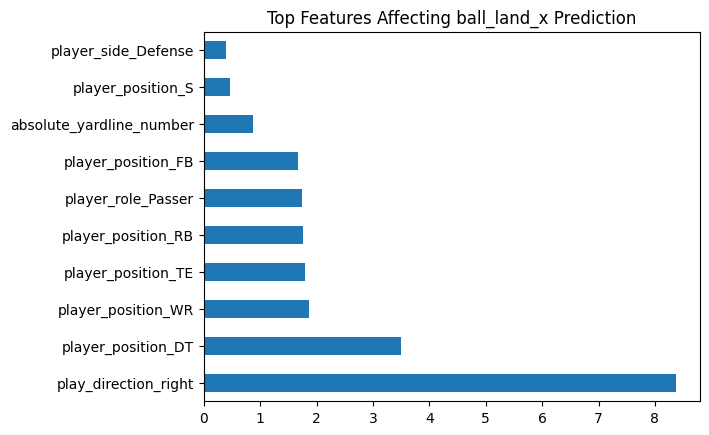

In [22]:
feature_importances = pd.Series(model.coef_[0], index=X.columns)
feature_importances.nlargest(10).plot(kind="barh")
plt.title("Top Features Affecting ball_land_x Prediction")
plt.show()


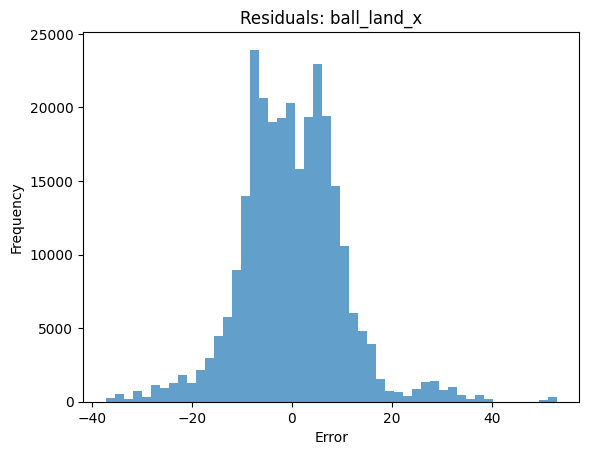

In [23]:
import matplotlib.pyplot as plt

plt.hist(y['ball_land_x'] - preds[:, 0], bins=50, alpha=0.7)
plt.title('Residuals: ball_land_x')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y)
rf_preds = rf.predict(X)
print("RF RMSE ball_land_x:", np.sqrt(mean_squared_error(y['ball_land_x'], rf_preds[:,0])))
print("RF RMSE ball_land_y:", np.sqrt(mean_squared_error(y['ball_land_y'], rf_preds[:,1])))


RF RMSE ball_land_x: 0.012289009510260327
RF RMSE ball_land_y: 0.03684980552877416


In [25]:
from sklearn.model_selection import train_test_split

# Split your data properly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Refit models
rf.fit(X_train, y_train)
rf_test_preds = rf.predict(X_test)

print("RF RMSE on TEST set:")
print("ball_land_x:", np.sqrt(mean_squared_error(y_test['ball_land_x'], rf_test_preds[:,0])))
print("ball_land_y:", np.sqrt(mean_squared_error(y_test['ball_land_y'], rf_test_preds[:,1])))



RF RMSE on TEST set:
ball_land_x: 0.03864423942840551
ball_land_y: 0.11444003683789207


In [26]:
# Create meaningful football features
def create_football_features(df):
    # Distance features
    df['dist_to_sideline'] = np.minimum(df['y'], 53.3 - df['y'])  # NFL field is 53.3 yards wide
    df['dist_from_center'] = np.abs(df['y'] - 26.65)
    
    # Speed and direction features
    df['speed_x'] = df['s'] * np.cos(np.radians(df['dir']))
    df['speed_y'] = df['s'] * np.sin(np.radians(df['dir']))
    
    # Formation features (if multiple players per play)
    # df['avg_team_x'] = df.groupby(['play_id', 'player_side'])['x'].transform('mean')
    
    return df


In [27]:
# Group by play and create sequences
def create_sequences(df, sequence_length=10):
    sequences = []
    targets = []
    
    for play_id in df['play_id'].unique():
        play_data = df[df['play_id'] == play_id].sort_values('frame_id')
        if len(play_data) >= sequence_length:
            # Take last N frames before ball release
            seq_data = play_data.iloc[-sequence_length:][numeric_features]
            target = play_data.iloc[-1][['ball_land_x', 'ball_land_y']]
            
            sequences.append(seq_data.values)
            targets.append(target.values)
    
    return np.array(sequences), np.array(targets)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(2)  # ball_land_x, ball_land_y
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


2025-10-01 16:22:53.236060: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759335773.613064      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759335773.711238      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [33]:
sequence_features = ['x', 'y', 's', 'a', 'dir', 'o']  # add more if helpful/encoded
target_features = ['ball_land_x', 'ball_land_y']
import numpy as np

seq_length = 10  # How many frames before the pass

def build_sequences(df, play_id_col='play_id', frame_id_col='frame_id'):
    X_seqs = []
    y_seqs = []
    for play_id in df[play_id_col].unique():
        play_df = df[df[play_id_col] == play_id].sort_values(frame_id_col)
        # Only use plays with at least seq_length frames
        if len(play_df) >= seq_length:
            seq = play_df[sequence_features].iloc[-seq_length:].values  # Last N frames
            target = play_df[target_features].iloc[-1].values  # Ball lands after pass
            X_seqs.append(seq)
            y_seqs.append(target)
    X_seqs = np.array(X_seqs)
    y_seqs = np.array(y_seqs)
    return X_seqs, y_seqs

# Example with your input_2023_w17 dataframe
X_seq, y_seq = build_sequences(input_2023_w17)
print(X_seq.shape, y_seq.shape)


(734, 10, 6) (734, 2)


In [34]:
from sklearn.model_selection import train_test_split

X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
num_features = X_seq_train.shape[2]


In [35]:
model = create_lstm_model(input_shape=(seq_length, num_features))
model.fit(X_seq_train, y_seq_train, epochs=20, batch_size=256, validation_split=0.2)


I0000 00:00:1759336297.950414      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759336297.951138      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


I0000 00:00:1759336303.914000     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 530ms/step - loss: 2689.2307 - mae: 43.9693 - val_loss: 2438.1355 - val_mae: 42.3009
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2676.7817 - mae: 43.7616 - val_loss: 2428.7324 - val_mae: 42.2010
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2656.1958 - mae: 43.6746 - val_loss: 2420.4280 - val_mae: 42.0975
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2639.7449 - mae: 43.5714 - val_loss: 2411.5073 - val_mae: 41.9761
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2633.3728 - mae: 43.3811 - val_loss: 2401.8254 - val_mae: 41.8387
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2600.2834 - mae: 43.1264 - val_loss: 2391.4290 - val_mae: 41.6904
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2597.8733 - mae: 43.0344 - val_loss: 2380.4226 - val_mae: 41.5326
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2618.4590 - mae: 43.1838 - val_loss: 2368.9539 - val_mae: 41.3693
Epoch 9/20
2/2 ━━━━━━━━━━━

In [36]:
lstm_preds = model.predict(X_seq_test)
from sklearn.metrics import mean_squared_error

rmse_x = np.sqrt(mean_squared_error(y_seq_test[:,0], lstm_preds[:,0]))
rmse_y = np.sqrt(mean_squared_error(y_seq_test[:,1], lstm_preds[:,1]))
print(f'LSTM RMSE ball_land_x: {rmse_x:.3f}, LSTM RMSE ball_land_y: {rmse_y:.3f}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
LSTM RMSE ball_land_x: 62.891, LSTM RMSE ball_land_y: 26.656


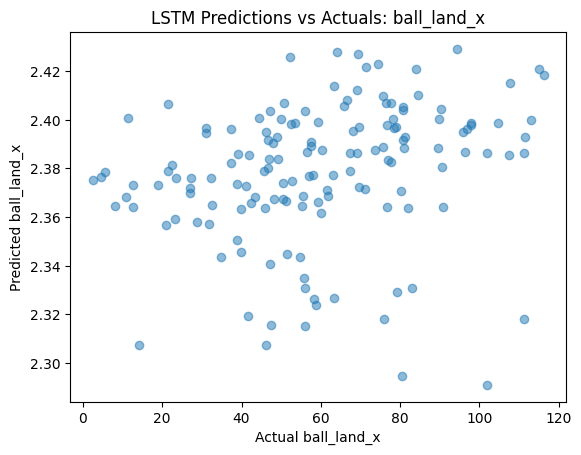

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y_seq_test[:,0], lstm_preds[:,0], alpha=0.5)
plt.xlabel('Actual ball_land_x')
plt.ylabel('Predicted ball_land_x')
plt.title('LSTM Predictions vs Actuals: ball_land_x')
plt.show()


In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select features for each frame in sequence
sequence_features = ['x', 'y', 's', 'a', 'dir', 'o']
target_features = ['ball_land_x', 'ball_land_y']
seq_length = 10

def build_sequences(df, play_id_col='play_id', frame_id_col='frame_id'):
    X_seqs, y_seqs = [], []
    for play_id in df[play_id_col].unique():
        play_df = df[df[play_id_col] == play_id].sort_values(frame_id_col)
        if len(play_df) >= seq_length:
            seq = play_df[sequence_features].iloc[-seq_length:].values
            target = play_df[target_features].iloc[-1].values
            X_seqs.append(seq)
            y_seqs.append(target)
    return np.array(X_seqs), np.array(y_seqs)

X_seq, y_seq = build_sequences(input_2023_w17)
print("Raw shapes:", X_seq.shape, y_seq.shape)

# Normalize features across all sequences
num_features = X_seq.shape[2]
X_seq_flat = X_seq.reshape(-1, num_features)
scaler = StandardScaler()
X_seq_flat_scaled = scaler.fit_transform(X_seq_flat)
X_seq_scaled = X_seq_flat_scaled.reshape(X_seq.shape)


Raw shapes: (734, 10, 6) (734, 2)


In [39]:
from sklearn.model_selection import train_test_split

X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(X_seq_scaled, y_seq, test_size=0.2, random_state=42)
print("Train shapes:", X_seq_train.shape, y_seq_train.shape)
print("Test shapes:", X_seq_test.shape, y_seq_test.shape)


Train shapes: (587, 10, 6) (587, 2)
Test shapes: (147, 10, 6) (147, 2)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(32),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(2)  # ball_land_x, ball_land_y
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = create_lstm_model((seq_length, num_features))
history = model.fit(
    X_seq_train, y_seq_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 5s - 1s/step - loss: 2645.5430 - mae: 43.4377 - val_loss: 2443.8909 - val_mae: 42.3490
Epoch 2/50
4/4 - 0s - 25ms/step - loss: 2596.6968 - mae: 43.0448 - val_loss: 2438.1587 - val_mae: 42.3010
Epoch 3/50
4/4 - 0s - 26ms/step - loss: 2556.3206 - mae: 42.7125 - val_loss: 2431.2019 - val_mae: 42.2402
Epoch 4/50
4/4 - 0s - 25ms/step - loss: 2521.0320 - mae: 42.3945 - val_loss: 2422.6787 - val_mae: 42.1619
Epoch 5/50
4/4 - 0s - 27ms/step - loss: 2491.1611 - mae: 42.1322 - val_loss: 2412.7898 - val_mae: 42.0691
Epoch 6/50
4/4 - 0s - 24ms/step - loss: 2459.8162 - mae: 41.8418 - val_loss: 2401.5164 - val_mae: 41.9620
Epoch 7/50
4/4 - 0s - 24ms/step - loss: 2433.1162 - mae: 41.6139 - val_loss: 2389.2620 - val_mae: 41.8472
Epoch 8/50
4/4 - 0s - 24ms/step - loss: 2408.6821 - mae: 41.3736 - val_loss: 2375.8582 - val_mae: 41.7257
Epoch 9/50
4/4 - 0s - 24ms/step - loss: 2374.7373 - mae: 41.1033 - val_loss: 2361.4363 - val_mae: 41.5939
Epoch 10/50
4/4 - 0s - 24ms/step - loss: 2357.5979 - mae: 4

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
LSTM RMSE ball_land_x: 26.414, LSTM RMSE ball_land_y: 15.854


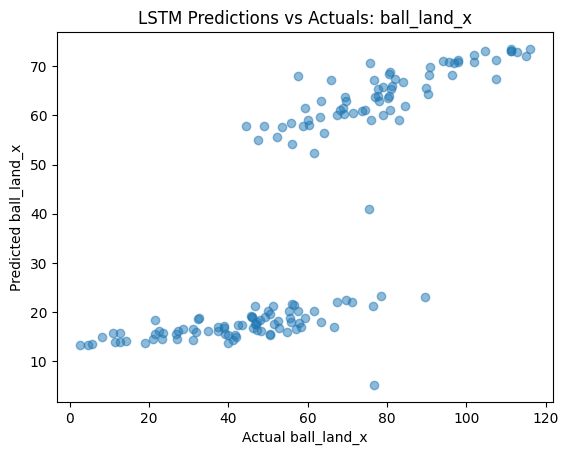

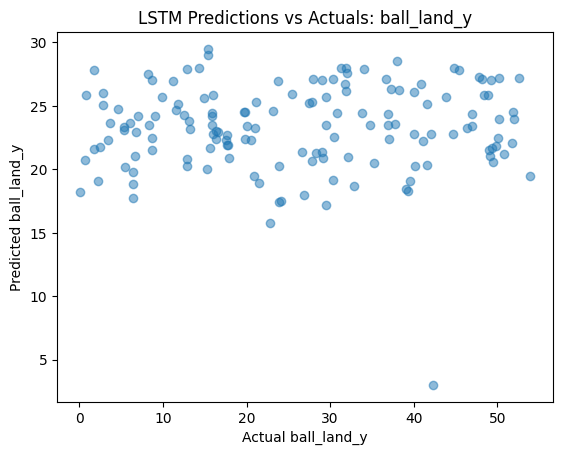

In [41]:
lstm_preds = model.predict(X_seq_test)
from sklearn.metrics import mean_squared_error

rmse_x = np.sqrt(mean_squared_error(y_seq_test[:,0], lstm_preds[:,0]))
rmse_y = np.sqrt(mean_squared_error(y_seq_test[:,1], lstm_preds[:,1]))
print(f'LSTM RMSE ball_land_x: {rmse_x:.3f}, LSTM RMSE ball_land_y: {rmse_y:.3f}')

import matplotlib.pyplot as plt
plt.scatter(y_seq_test[:,0], lstm_preds[:,0], alpha=0.5)
plt.xlabel('Actual ball_land_x')
plt.ylabel('Predicted ball_land_x')
plt.title('LSTM Predictions vs Actuals: ball_land_x')
plt.show()

plt.scatter(y_seq_test[:,1], lstm_preds[:,1], alpha=0.5)
plt.xlabel('Actual ball_land_y')
plt.ylabel('Predicted ball_land_y')
plt.title('LSTM Predictions vs Actuals: ball_land_y')
plt.show()


In [42]:
import xgboost as xgb
import numpy as np

# Feature Aggregation: Mean, Std, First, and Last Frame
agg_features = np.concatenate([
    X_seq.mean(axis=1),
    X_seq.std(axis=1),
    X_seq[:,-1,:],    # last frame
    X_seq[:,0,:],     # first frame
    X_seq[:,-1,:] - X_seq[:,0,:]  # change from first to last
], axis=1)

X_train_agg, X_test_agg, y_train_agg, y_test_agg = train_test_split(
    agg_features, y_seq, test_size=0.2, random_state=42
)

xgb_reg_x = xgb.XGBRegressor(n_estimators=200)
xgb_reg_x.fit(X_train_agg, y_train_agg[:, 0])

xgb_reg_y = xgb.XGBRegressor(n_estimators=200)
xgb_reg_y.fit(X_train_agg, y_train_agg[:, 1])

pred_x = xgb_reg_x.predict(X_test_agg)
pred_y = xgb_reg_y.predict(X_test_agg)

from sklearn.metrics import mean_squared_error
rmse_x = np.sqrt(mean_squared_error(y_test_agg[:,0], pred_x))
rmse_y = np.sqrt(mean_squared_error(y_test_agg[:,1], pred_y))
print(f'XGBoost RMSE ball_land_x: {rmse_x:.3f}, ball_land_y: {rmse_y:.3f}')


XGBoost RMSE ball_land_x: 9.407, ball_land_y: 12.820


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Dropout

cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(seq_length, num_features)),
    Dropout(0.3),
    Conv1D(32, kernel_size=3, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(2)  # ball_land_x, ball_land_y
])
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_model.fit(X_seq_train, y_seq_train, epochs=200, batch_size=64, validation_split=0.2, verbose=2)

cnn_preds = cnn_model.predict(X_seq_test)
cnn_rmse_x = np.sqrt(mean_squared_error(y_seq_test[:,0], cnn_preds[:,0]))
cnn_rmse_y = np.sqrt(mean_squared_error(y_seq_test[:,1], cnn_preds[:,1]))
print(f'CNN RMSE ball_land_x: {cnn_rmse_x:.3f}, CNN RMSE ball_land_y: {cnn_rmse_y:.3f}')


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 - 4s - 504ms/step - loss: 2639.8152 - mae: 43.5748 - val_loss: 2387.8999 - val_mae: 41.8148
Epoch 2/200
8/8 - 0s - 11ms/step - loss: 2569.5154 - mae: 42.8968 - val_loss: 2299.3582 - val_mae: 40.9263
Epoch 3/200
8/8 - 0s - 11ms/step - loss: 2454.4758 - mae: 41.7956 - val_loss: 2157.9729 - val_mae: 39.5130
Epoch 4/200
8/8 - 0s - 11ms/step - loss: 2264.1748 - mae: 39.9875 - val_loss: 1944.4677 - val_mae: 37.3336
Epoch 5/200
8/8 - 0s - 11ms/step - loss: 1992.2775 - mae: 37.2463 - val_loss: 1637.3745 - val_mae: 34.0144
Epoch 6/200
8/8 - 0s - 11ms/step - loss: 1619.8745 - mae: 33.2036 - val_loss: 1234.1935 - val_mae: 29.3896
Epoch 7/200
8/8 - 0s - 11ms/step - loss: 1149.3806 - mae: 27.7167 - val_loss: 785.3282 - val_mae: 23.4197
Epoch 8/200
8/8 - 0s - 11ms/step - loss: 655.8149 - mae: 20.8967 - val_loss: 403.8508 - val_mae: 16.5086
Epoch 9/200
8/8 - 0s - 11ms/step - loss: 317.3258 - mae: 14.5730 - val_loss: 253.0796 - val_mae: 12.8154
Epoch 10/200
8/8 - 0s - 11ms/step - loss: 252.3079 - 

In [47]:
from tensorflow.keras.layers import GRU

def create_gru_model(input_shape):
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        GRU(32),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(2)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

gru_model = create_gru_model((seq_length, num_features))
gru_model.fit(X_seq_train, y_seq_train, epochs=200, batch_size=128, validation_split=0.2, verbose=2)

gru_preds = gru_model.predict(X_seq_test)
gru_rmse_x = np.sqrt(mean_squared_error(y_seq_test[:,0], gru_preds[:,0]))
gru_rmse_y = np.sqrt(mean_squared_error(y_seq_test[:,1], gru_preds[:,1]))
print(f'GRU RMSE ball_land_x: {gru_rmse_x:.3f}, GRU RMSE ball_land_y: {gru_rmse_y:.3f}')


Epoch 1/200
4/4 - 3s - 794ms/step - loss: 2667.5845 - mae: 43.7912 - val_loss: 2434.7815 - val_mae: 42.2642
Epoch 2/200
4/4 - 0s - 23ms/step - loss: 2650.2510 - mae: 43.6397 - val_loss: 2416.3069 - val_mae: 42.0971
Epoch 3/200
4/4 - 0s - 22ms/step - loss: 2628.3613 - mae: 43.4446 - val_loss: 2390.0330 - val_mae: 41.8613
Epoch 4/200
4/4 - 0s - 23ms/step - loss: 2596.3955 - mae: 43.1537 - val_loss: 2350.2612 - val_mae: 41.5038
Epoch 5/200
4/4 - 0s - 22ms/step - loss: 2546.1199 - mae: 42.6970 - val_loss: 2293.6936 - val_mae: 40.9875
Epoch 6/200
4/4 - 0s - 22ms/step - loss: 2474.2288 - mae: 42.0372 - val_loss: 2229.8999 - val_mae: 40.3644
Epoch 7/200
4/4 - 0s - 22ms/step - loss: 2399.0330 - mae: 41.3042 - val_loss: 2163.4807 - val_mae: 39.6407
Epoch 8/200
4/4 - 0s - 22ms/step - loss: 2337.1365 - mae: 40.6250 - val_loss: 2096.1875 - val_mae: 38.8651
Epoch 9/200
4/4 - 0s - 22ms/step - loss: 2268.9832 - mae: 39.8507 - val_loss: 2031.8184 - val_mae: 38.0711
Epoch 10/200
4/4 - 0s - 22ms/step - 

In [51]:
ensemble_x = (0.4 * pred_x + 0.3 * cnn_preds[:,0] + 0.3 * gru_preds[:,0])
ensemble_y = (0.4 * pred_y + 0.3 * cnn_preds[:,1] + 0.3 * gru_preds[:,1])
print('Ensemble RMSE (x):', np.sqrt(mean_squared_error(y_test_agg[:,0], ensemble_x)))
print('Ensemble RMSE (y):', np.sqrt(mean_squared_error(y_test_agg[:,1], ensemble_y)))


Ensemble RMSE (x): 9.093621695651594
Ensemble RMSE (y): 12.269327470984537


In [52]:
all_inputs['speed_dir'] = all_inputs['s'] * np.cos(np.radians(all_inputs['dir']))
all_inputs['accel_dir'] = all_inputs['a'] * np.sin(np.radians(all_inputs['dir']))
# Add role-based averages, context, etc.


In [50]:
X_seq, y_seq = build_sequences(all_inputs)
print(X_seq.shape, y_seq.shape)  # Should be much larger now


(4317, 10, 6) (4317, 2)


In [53]:
from sklearn.preprocessing import StandardScaler

num_features = X_seq.shape[2]
X_seq_flat = X_seq.reshape(-1, num_features)
scaler = StandardScaler()
X_seq_flat_scaled = scaler.fit_transform(X_seq_flat)
X_seq_scaled = X_seq_flat_scaled.reshape(X_seq.shape)


In [54]:
from sklearn.model_selection import train_test_split

X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(X_seq_scaled, y_seq, test_size=0.2, random_state=42)


In [55]:
import numpy as np

agg_features = np.concatenate([
    X_seq.mean(axis=1),
    X_seq.std(axis=1),
    X_seq[:,-1,:],
    X_seq[:,0,:],
    X_seq[:,-1,:] - X_seq[:,0,:]
], axis=1)

X_train_agg, X_test_agg, y_train_agg, y_test_agg = train_test_split(
    agg_features, y_seq, test_size=0.2, random_state=42
)


In [56]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_reg_x = xgb.XGBRegressor(n_estimators=200)
xgb_reg_x.fit(X_train_agg, y_train_agg[:, 0])

xgb_reg_y = xgb.XGBRegressor(n_estimators=200)
xgb_reg_y.fit(X_train_agg, y_train_agg[:, 1])

pred_x = xgb_reg_x.predict(X_test_agg)
pred_y = xgb_reg_y.predict(X_test_agg)

rmse_x = np.sqrt(mean_squared_error(y_test_agg[:,0], pred_x))
rmse_y = np.sqrt(mean_squared_error(y_test_agg[:,1], pred_y))
print(f'XGBoost RMSE ball_land_x: {rmse_x:.3f}, ball_land_y: {rmse_y:.3f}')


XGBoost RMSE ball_land_x: 11.985, ball_land_y: 12.042


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Dropout

cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_seq_train.shape[1], X_seq_train.shape[2])),
    Dropout(0.3),
    Conv1D(32, kernel_size=3, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(2)
])
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_model.fit(X_seq_train, y_seq_train, epochs=200, batch_size=64, validation_split=0.2, verbose=2)

cnn_preds = cnn_model.predict(X_seq_test)
cnn_rmse_x = np.sqrt(mean_squared_error(y_seq_test[:,0], cnn_preds[:,0]))
cnn_rmse_y = np.sqrt(mean_squared_error(y_seq_test[:,1], cnn_preds[:,1]))
print(f'CNN RMSE ball_land_x: {cnn_rmse_x:.3f}, CNN RMSE ball_land_y: {cnn_rmse_y:.3f}')


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 - 4s - 92ms/step - loss: 2287.6555 - mae: 40.0340 - val_loss: 1432.3470 - val_mae: 30.4639
Epoch 2/200
44/44 - 0s - 4ms/step - loss: 581.8502 - mae: 18.6268 - val_loss: 244.8862 - val_mae: 12.4405
Epoch 3/200
44/44 - 0s - 4ms/step - loss: 249.8717 - mae: 12.6369 - val_loss: 225.8315 - val_mae: 11.8884
Epoch 4/200
44/44 - 0s - 4ms/step - loss: 237.1273 - mae: 12.3693 - val_loss: 221.1910 - val_mae: 11.7809
Epoch 5/200
44/44 - 0s - 4ms/step - loss: 229.8977 - mae: 12.1648 - val_loss: 211.1142 - val_mae: 11.5543
Epoch 6/200
44/44 - 0s - 4ms/step - loss: 215.9565 - mae: 11.8495 - val_loss: 197.8889 - val_mae: 11.2342
Epoch 7/200
44/44 - 0s - 4ms/step - loss: 202.7871 - mae: 11.5365 - val_loss: 185.9412 - val_mae: 10.9028
Epoch 8/200
44/44 - 0s - 4ms/step - loss: 187.6347 - mae: 11.1470 - val_loss: 176.2583 - val_mae: 10.6237
Epoch 9/200
44/44 - 0s - 4ms/step - loss: 181.3320 - mae: 10.8560 - val_loss: 172.6904 - val_mae: 10.4651
Epoch 10/200
44/44 - 0s - 4ms/step - loss: 176.7030 - m

In [60]:
from tensorflow.keras.layers import GRU

def create_gru_model(input_shape):
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        GRU(32),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(2)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

gru_model = create_gru_model((X_seq_train.shape[1], X_seq_train.shape[2]))
gru_model.fit(X_seq_train, y_seq_train, epochs=100, batch_size=128, validation_split=0.2, verbose=2)

gru_preds = gru_model.predict(X_seq_test)
gru_rmse_x = np.sqrt(mean_squared_error(y_seq_test[:,0], gru_preds[:,0]))
gru_rmse_y = np.sqrt(mean_squared_error(y_seq_test[:,1], gru_preds[:,1]))
print(f'GRU RMSE ball_land_x: {gru_rmse_x:.3f}, GRU RMSE ball_land_y: {gru_rmse_y:.3f}')


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 - 3s - 152ms/step - loss: 2596.7271 - mae: 43.3318 - val_loss: 2405.2896 - val_mae: 41.2789
Epoch 2/100
22/22 - 0s - 10ms/step - loss: 2279.3887 - mae: 39.8815 - val_loss: 2041.2823 - val_mae: 36.7031
Epoch 3/100
22/22 - 0s - 9ms/step - loss: 1947.9525 - mae: 35.9254 - val_loss: 1737.1929 - val_mae: 33.1958
Epoch 4/100
22/22 - 0s - 9ms/step - loss: 1629.0177 - mae: 32.3524 - val_loss: 1426.5554 - val_mae: 29.5596
Epoch 5/100
22/22 - 0s - 9ms/step - loss: 1329.4467 - mae: 28.8188 - val_loss: 1142.2164 - val_mae: 26.1406
Epoch 6/100
22/22 - 0s - 10ms/step - loss: 1066.0465 - mae: 25.6090 - val_loss: 909.7119 - val_mae: 23.2852
Epoch 7/100
22/22 - 0s - 9ms/step - loss: 854.2631 - mae: 22.8849 - val_loss: 736.9798 - val_mae: 21.0484
Epoch 8/100
22/22 - 0s - 9ms/step - loss: 704.1554 - mae: 20.8279 - val_loss: 618.9424 - val_mae: 19.4637
Epoch 9/100
22/22 - 0s - 9ms/step - loss: 607.7947 - mae: 19.4810 - val_loss: 540.3700 - val_mae: 18.3721
Epoch 10/100
22/22 - 0s - 9ms/step - loss: 

In [61]:
ensemble_x = (0.4 * pred_x + 0.3 * cnn_preds[:,0] + 0.3 * gru_preds[:,0])
ensemble_y = (0.4 * pred_y + 0.3 * cnn_preds[:,1] + 0.3 * gru_preds[:,1])
print('Ensemble RMSE ball_land_x:', np.sqrt(mean_squared_error(y_seq_test[:,0], ensemble_x)))
print('Ensemble RMSE ball_land_y:', np.sqrt(mean_squared_error(y_seq_test[:,1], ensemble_y)))


Ensemble RMSE ball_land_x: 11.201058334749883
Ensemble RMSE ball_land_y: 11.239080045662334


In [62]:
# Example: Add distance to mean team position per frame
all_inputs['mean_team_x'] = all_inputs.groupby(['play_id', 'player_side'])['x'].transform('mean')
all_inputs['dist_to_team_mean'] = np.abs(all_inputs['x'] - all_inputs['mean_team_x'])

# More football-driven features
# Distance to line of scrimmage, endzone, sideline, etc.

# Rebuild sequences after adding new features
sequence_features = ['x', 'y', 's', 'a', 'dir', 'o', 'dist_to_team_mean']  # add more engineered features!
X_seq, y_seq = build_sequences(all_inputs)
